# Regressão Linear Múltipla

Experimento para prever o número de likes em uma postagem com base na reputação do autor, o número de perguntas na postagem e seu número de visualizações.

Fonte: https://www.kaggle.com/umairnsr87/predict-the-number-of-upvotes-a-post-will-get?select=train_NIR5Yl1.csv

In [5]:
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/VOCruz/Regressao_Linear_Multipla/main/train_NIR5Yl1.csv")

dados.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [6]:
dados.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [37]:
X = dados.iloc[:, [2,3,5]].values
y = dados.iloc[:,6].values

In [38]:
X_train = X[0:30000]
X_test = X[30000:]

In [39]:
y_train = y[0:30000]
y_test = y[30000:]

## Análize de Correlação

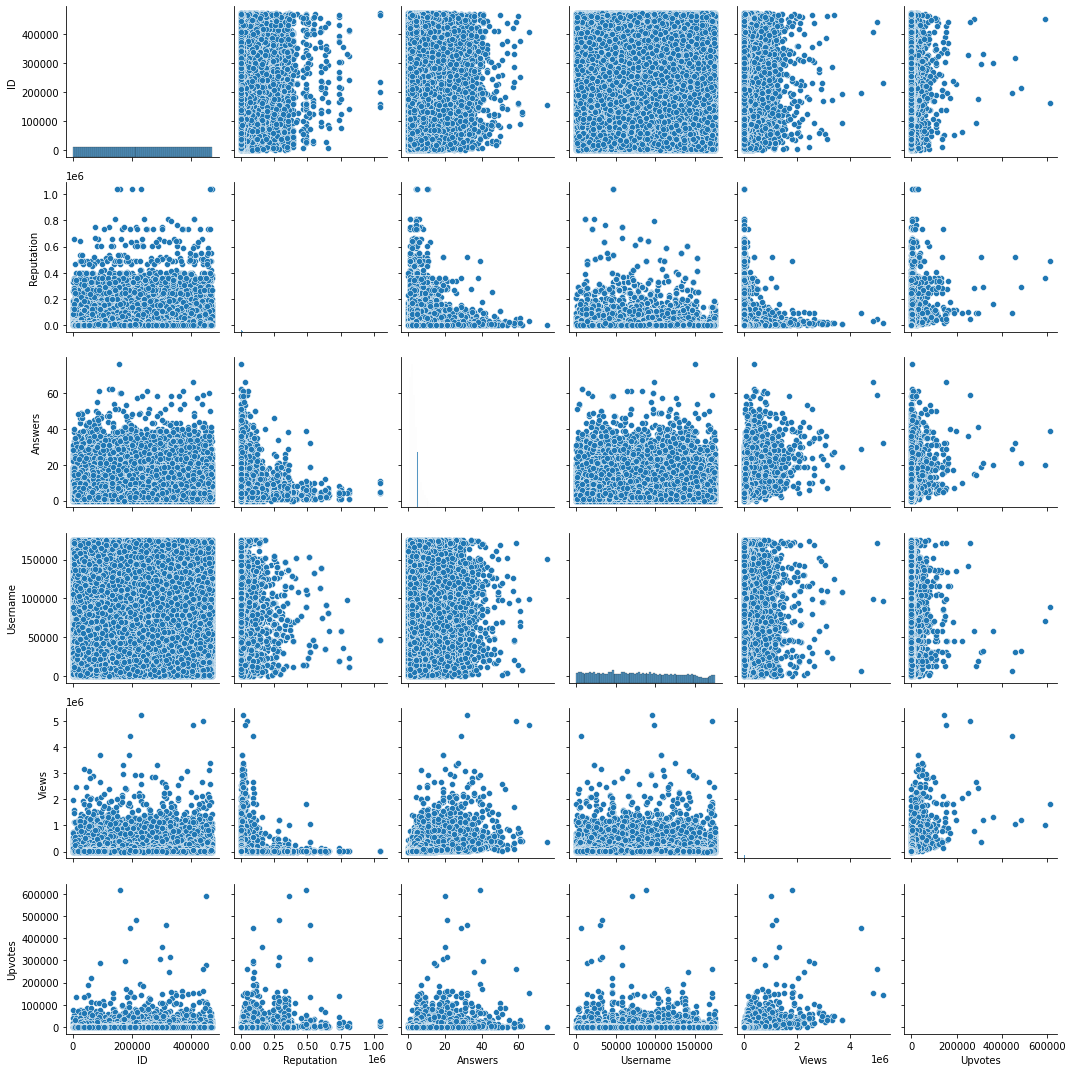

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dados)
plt.tight_layout()

In [41]:
dados.corr()

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


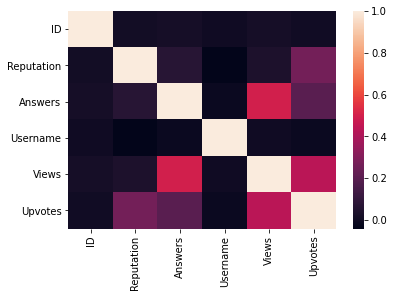

In [42]:
sns.heatmap(dados.corr())

## Ajuste

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

In [44]:
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 9721937.55


In [45]:
print("Variance score: %.2f" % r2_score(y_test, y_pred))

Variance score: 0.25


In [46]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [  0.02786403 -17.26169125   0.01966199]
